<a href="https://colab.research.google.com/github/shubham953/TensorFlow-Sequential-and-Functional-API/blob/main/TensorFlow_Sequential_and_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk

Downloading...
From: https://drive.google.com/uc?id=1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
To: /content/spiral.csv
100% 12.9k/12.9k [00:00<00:00, 37.5MB/s]


In [2]:
!ls -lrt

total 20
drwxr-xr-x 1 root root  4096 Aug 15 13:37 sample_data
-rw-r--r-- 1 root root 12867 Aug 17 09:51 spiral.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('spiral.csv')

In [4]:
df

,x1,x2,y
0,0.000000,0.000000,0
1,-0.000650,0.010080,0
2,0.009809,0.017661,0
3,0.007487,0.029364,0
4,-0.000027,0.040404,0
...,...,...,...
295,-0.829548,0.482363,2
296,-0.753207,0.610731,2
297,-0.631949,0.748762,2
298,-0.581099,0.801389,2


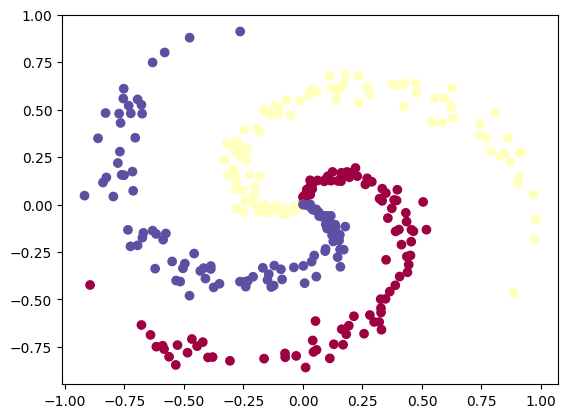

In [10]:
plt.scatter(df['x1'],df['x2'], c=df['y'],cmap=plt.cm.Spectral)
plt.show()

In [12]:
X = df.iloc[:,:-1]

In [14]:
Y=df.iloc[:,-1]

# Tensorflow Sequential API

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [18]:
model = keras.Sequential()

In [21]:
model.add(keras.Input(shape=(2,)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(3,activation = 'softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        multiple                  0         
                                                                 
 dense_1 (Dense)             (None, 100)               300       
                                                                 
 dense_2 (Dense)             (None, 3)                 303       
                                                                 
Total params: 603
Trainable params: 603
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.api._v2.keras import metrics
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=keras.losses.CategoricalCrossentropy(),metrics=tf.keras.metrics.binary_accuracy)

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
Y_OHE=to_categorical(Y)

In [33]:
model.fit(X,Y_OHE,epochs=100,batch_size=256)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 0.9284 - binary_accuracy: 0.6833
Epoch 2/100
2/2 [==============================] - 0s 17ms/step - loss: 0.9225 - binary_accuracy: 0.6922
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 0.9165 - binary_accuracy: 0.7067
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 0.9107 - binary_accuracy: 0.7178
Epoch 5/100
2/2 [==============================] - 0s 17ms/step - loss: 0.9048 - binary_accuracy: 0.7322
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 0.8991 - binary_accuracy: 0.7411
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 0.8933 - binary_accuracy: 0.7444
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 0.8876 - binary_accuracy: 0.7544
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 0.8821 - binary_accuracy: 0.7589
Epoch 10/100
2/2 [==============================] - 0s 9ms

# TensorFlow Functional API

In [49]:
Inputs = keras.Input(shape=(2,))

In [54]:
x=keras.layers.Dense(100,activation='relu')(Inputs)

In [55]:
outputs=keras.layers.Dense(3,activation = 'softmax')(x)

In [56]:
model = keras.Model(inputs=Inputs, outputs=outputs, name="simple_model")

In [57]:
model.summary()

Model: "simple_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_11 (Dense)            (None, 100)               300       
                                                                 
 dense_12 (Dense)            (None, 3)                 303       
                                                                 
Total params: 603
Trainable params: 603
Non-trainable params: 0
_________________________________________________________________


In [62]:
from keras.metrics.accuracy_metrics import BinaryAccuracy
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=tf.keras.metrics.BinaryAccuracy())
model.fit(X,Y_OHE,epochs=100,batch_size=258)

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 1.1188 - binary_accuracy: 0.6667
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 1.1092 - binary_accuracy: 0.6667
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 1.0998 - binary_accuracy: 0.6667
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 1.0908 - binary_accuracy: 0.6667
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 1.0820 - binary_accuracy: 0.6667
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 1.0734 - binary_accuracy: 0.6667
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 1.0648 - binary_accuracy: 0.6667
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 1.0563 - binary_accuracy: 0.6667
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 1.0480 - binary_accuracy: 0.6667
Epoch 10/100
2/2 [==============================] - 0s 7ms/ste

In [63]:
model.summary()

Model: "simple_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_11 (Dense)            (None, 100)               300       
                                                                 
 dense_12 (Dense)            (None, 3)                 303       
                                                                 
Total params: 603
Trainable params: 603
Non-trainable params: 0
_________________________________________________________________
